# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [103]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
from uncertainties import unumpy

In [37]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

Absorption of gamma rays in a different medium (Cobalt 60)

In [120]:
#measurements from the Messung4 .csv files
# for bp only one measurement was made per plate, for al 2

bg = 47 #/60
#pb values
pb = np.array([89, 98, 89, 74, 76]) # * (1/60)
pb_c = pb - bg 
pb_clog = np.log(pb_c)
pb_ts = np.array([1.6, 1.6, 1.7, 1.75, 1.6])
pb_t = np.array([1.6, 1.6+1.6, 1.6+1.6+1.7, 1.6+1.6+1.7+1.75, 1.6+1.6+1.7+1.75+1.6])

#al values
al = 1/2 * np.array([(90+89), (99+89), (90+93), (89+89), (89+83)])
al_c = al - bg
al_clog = np.log(al_c)
al_t = 1.6 * np.array([1, 2 ,3 ,4 ,5])

#errors
pb_e = np.sqrt(pb)
pb_c_e = np.sqrt(pb + bg)
pb_clog_e = pb_c_e / pb_c
pb_t_e = np.array([0.05, 0.1, 0.11, 0.12, 0.165])

al_e = np.sqrt(al)
al_c_e = np.sqrt(al + bg)
al_clog_e = al_c_e / al_c
al_t_e = np.array([0.05, 0.1, 0.15, 0.2, 0.25])


#linear fit pb
def linfunc(x,a, b):
    y = a*x + b
    return y

OptVal1, CovarianceMatrix1 = sp.optimize.curve_fit(linfunc, pb_t,pb_clog, sigma = pb_clog_e)
k = OptVal1[0]
j = OptVal1[1]
kj_err = np.sqrt(abs(CovarianceMatrix1[0]))
print('fit pb result:', k,j, kj_err)

#linear fit al
def linfunc(x,a, b):
    y = a*x + b
    return y

OptVal2, CovarianceMatrix2 = sp.optimize.curve_fit(linfunc, al_t,al_clog, sigma = al_clog_e)
o = OptVal2[0]
u = OptVal2[1]
ou_err = np.sqrt(abs(CovarianceMatrix1[0]))
print('fit al result:', o,u, ou_err)

#calculate absorption coefficients
hd_pb = np.log(2)/ufloat(k,kj_err[0])
hd_al = np.log(2)/ufloat(o,ou_err[0])

print('Halbwertsdicken')
print(hd_pb)
print(hd_al)



fit pb result: -0.07785451218034116 4.034315666633826 [0.03855825 0.07899937]
fit al result: -0.017724151078644834 3.84818191078354 [0.03855825 0.07899937]
Halbwertsdicken
-9+/-4
(-4+/-9)e+01


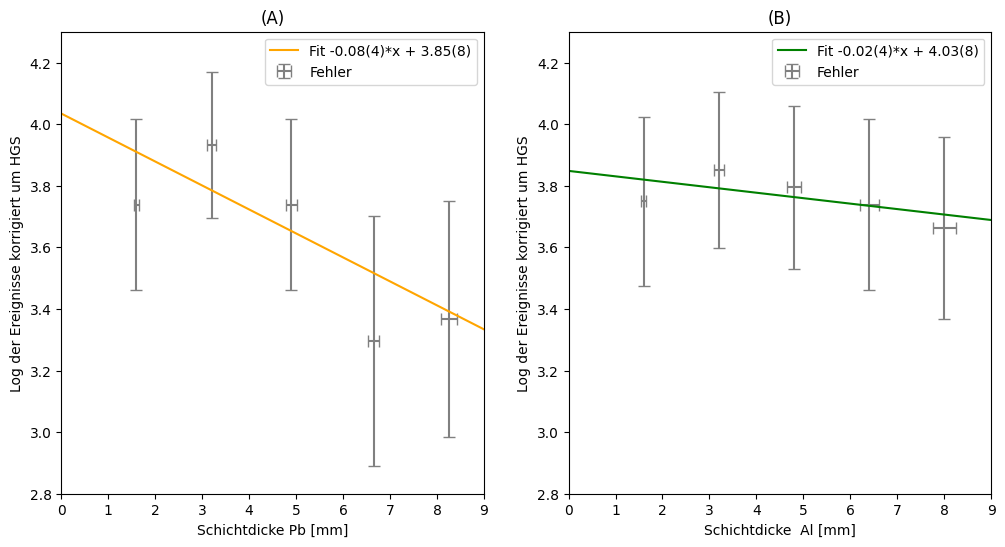

In [119]:
#matplotlib plot

fig, axs=plt.subplots(1, 2, figsize=(12, 6)) #defining figure object
axs[0].errorbar(pb_t, pb_clog, xerr = pb_t_e,  yerr = pb_clog_e ,linestyle='none',capsize = 4, label = 'Fehler', color = 'grey')
axs[0].plot(np.arange(0,10), linfunc(np.arange(0,10), k, j), label = 'Fit -0.08(4)*x + 3.85(8)', color = 'orange')
axs[0].set_xlabel('Schichtdicke Pb [mm]')
axs[0].set_ylabel('Log der Ereignisse korrigiert um HGS')
axs[0].set_title('(A)')
axs[0].set_xlim((0,9))
axs[0].set_ylim((2.8,4.3))
axs[0].legend()
axs[1].errorbar(al_t, al_clog, xerr = al_t_e,  yerr = al_clog_e ,linestyle='none',capsize = 4, label = 'Fehler', color = 'grey')
axs[1].plot(np.arange(0,10), linfunc(np.arange(0,10), o, u), label = 'Fit -0.02(4)*x + 4.03(8)', color = 'green')
axs[1].set_xlabel('Schichtdicke  Al [mm]')
axs[1].set_ylabel('Log der Ereignisse korrigiert um HGS')
axs[1].set_title('(B)')
axs[1].set_xlim((0,9))
axs[1].set_ylim((2.8,4.3))
axs[1].legend()
plt.show()

   pb_t  pb_t_e   pb_clog  pb_clog_e
0  1.60   0.050  3.737670   0.277664
1  3.20   0.100  3.931826   0.236110
2  4.90   0.110  3.737670   0.277664
3  6.65   0.120  3.295837   0.407407
4  8.25   0.165  3.367296   0.382432


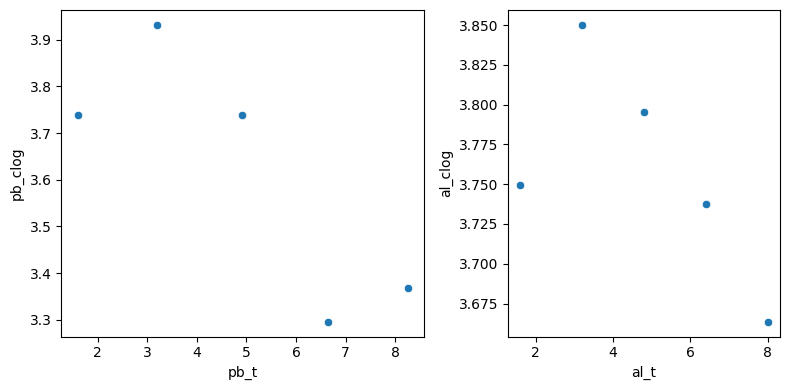

In [114]:
#seaborn plot
p= {'pb_t': pb_t, 'pb_t_e': pb_t_e, 'pb_clog': pb_clog, 'pb_clog_e': pb_clog_e}
vals_pb = pd.DataFrame(p)
print(vals_pb)
a= {'al_t': al_t, 'al_t_e': al_t_e, 'al_clog': al_clog, 'al_clog_e': al_clog_e}
vals_al = pd.DataFrame(a)

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=vals_pb, x="pb_t", y="pb_clog", ax=axs[0])
sns.scatterplot(data=vals_al, x="al_t", y="al_clog", ax=axs[1])
f.tight_layout()